In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.python.keras import backend as K

from keras.utils import plot_model

from sklearn.utils import shuffle
import os
import multiprocessing
from pathlib import Path
from IPython.display import Image

from utils.DomainImageGenerator import DomainImageGenerator

2025-07-16 13:52:42.928004: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:52:42.932823: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:52:42.944665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752666762.962877  663400 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752666762.968298  663400 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-16 13:52:42.987585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Load the Dataset as Generators so not all images are loaded into ram at the same time. The generator class loads the needed images per batch
cpu_count = multiprocessing.cpu_count()
njobs = int(cpu_count * 0.9) # Just set to use some percent of cpus
max_queue_size = 15
use_multiprocessing = True

train_gen = DomainImageGenerator("prepared/train.csv", batch_size=64, img_size=(32, 32), shuffle=True, n_jobs=njobs, use_multiprocessing=use_multiprocessing, max_queue_size=max_queue_size) # "batch_size=64, img_size=(32, 32), shuffle=True]" are the default values
val_gen = DomainImageGenerator("prepared/valid.csv", batch_size=64, n_jobs=njobs, use_multiprocessing=use_multiprocessing, max_queue_size=max_queue_size)

In [3]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2025-07-16 13:52:45.253550: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,708,033 (6.52 MB)

 Trainable params: 1,706,497 (6.51 MB)

 Non-trainable params: 1,536 (6.00 KB)

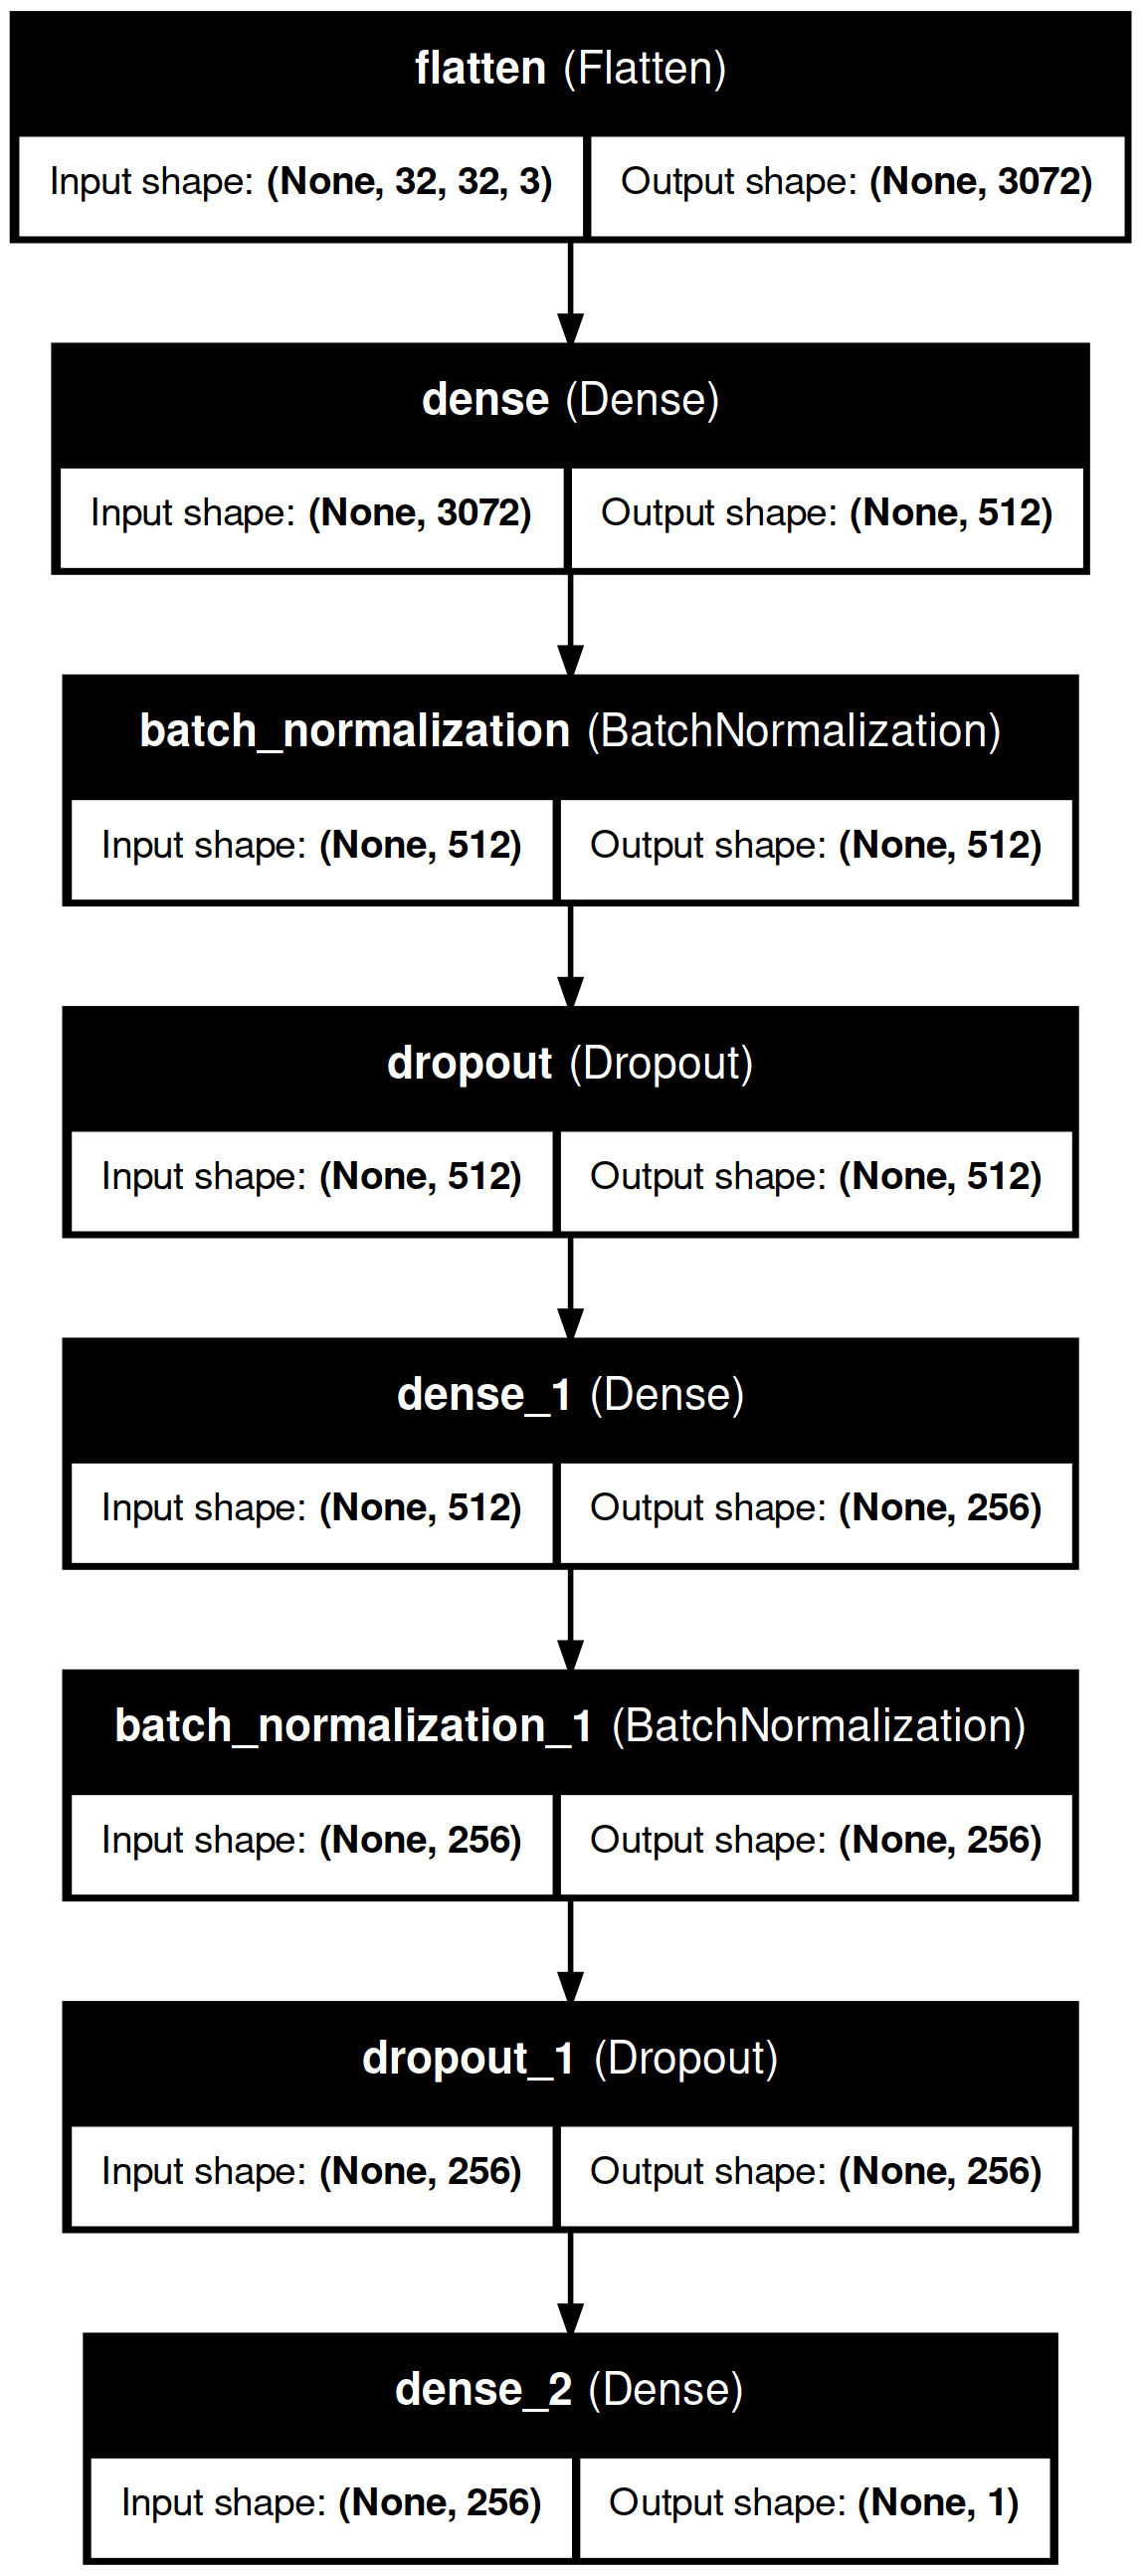

In [5]:
Path("build").mkdir(parents=True, exist_ok=True)
Path("build/DeepNoConvolutionModel").mkdir(parents=True, exist_ok=True)

plot_model(model, to_file='build/DeepNoConvolutionModel/Model.png', show_shapes=True, show_layer_names=True)
Image('build/DeepNoConvolutionModel/Model.png')

In [6]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    verbose=1
)

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7286 - loss: 0.6048 - val_accuracy: 0.7756 - val_loss: 0.5264
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7739 - loss: 0.5284 - val_accuracy: 0.7762 - val_loss: 0.5264
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7773 - loss: 0.5222 - val_accuracy: 0.7773 - val_loss: 0.5189
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7764 - loss: 0.5200 - val_accuracy: 0.7778 - val_loss: 0.5228
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7780 - loss: 0.5172 - val_accuracy: 0.7760 - val_loss: 0.5274
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7762 - loss: 0.5183 - val_accuracy: 0.7779 - val_loss: 0.5187
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7773 - loss: 0.5160 - val_accuracy: 0.7778 - val_loss: 0.5189
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7774 -

In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


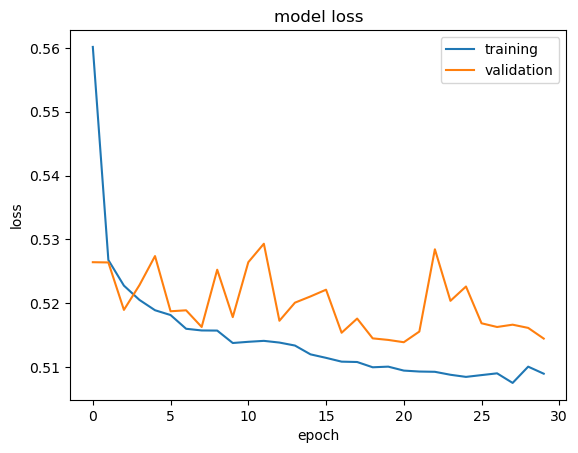

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.savefig("build/DeepNoConvolutionModel/Loss.png")
plt.show()

In [9]:
model.save("../models/DeepNoConvolutionModel.keras")